# 전처리

## data load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('BankChurners.csv')

In [3]:
del data_df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
del data_df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']

## raw data 확인

- numerical이 다수
- categorical 6개

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## 분류

In [7]:
# categorical column과 numeric column을 분류
# List Comprehension
cat_col = [x for x in data_df.columns if data_df[x].dtype == 'O']
num_col = [x for x in data_df.columns if x not in cat_col]

print('cat_col : {} \n\
num_col : {}'.format(len(cat_col), len(num_col)))

cat_col : 6 
num_col : 15


### Categorical Column


In [12]:
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust()

<Figure size 2160x2160 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


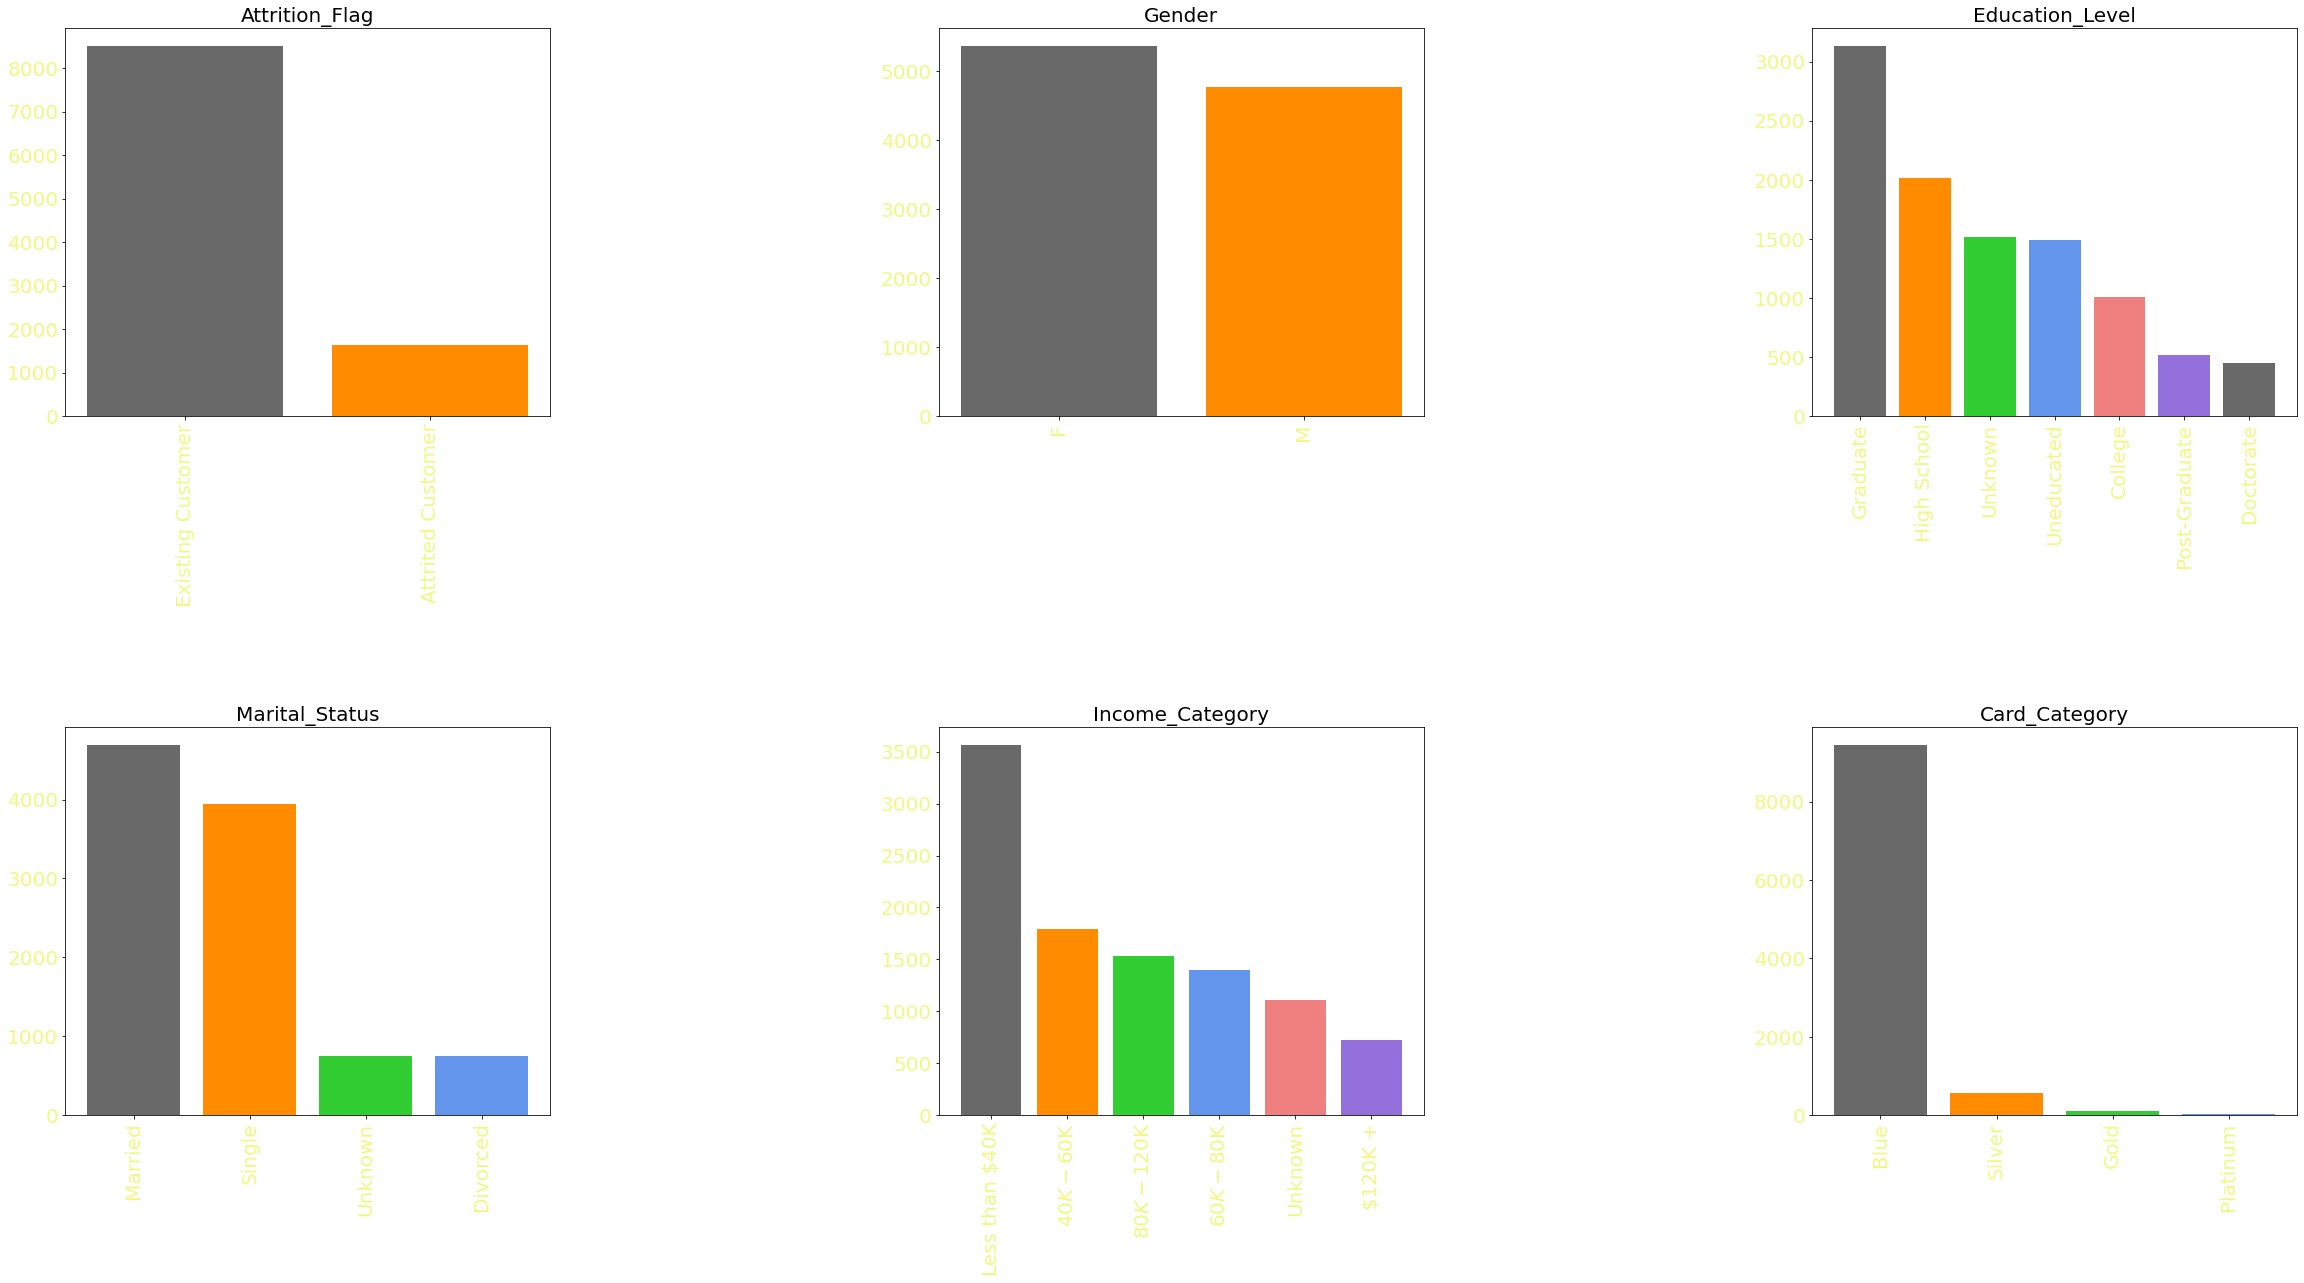

In [16]:
fig = plt.figure(figsize=(40, 20))
fig.subplots_adjust(hspace=0.8, wspace=0.8) #그래프별 간격 조정

for i,var in enumerate(cat_col):
    tmp = data_df[var].value_counts().reset_index()
    ax = fig.add_subplot(2, 3, i+1)
    ax.bar(tmp['index'], tmp[var], color=['dimgray','darkorange','limegreen','cornflowerblue','lightcoral','mediumpurple'])
    ax.set_title(var, fontsize = 20)
    ax.set_xticklabels(tmp['index'], rotation=90)
    plt.xticks(color='#F3F781', fontsize =20) 
    plt.yticks(color='#F3F781', fontsize =20) 

### 결측치 처리

In [17]:
df[df == 'Unknown'].count()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [18]:
df_Unknown = ['Unknown']
df.drop(df[df['Marital_Status'].isin(df_Unknown)].index, inplace = True)
df.drop(df[df['Education_Level'].isin(df_Unknown)].index, inplace = True)
df.drop(df[df['Income_Category'].isin(df_Unknown)].index, inplace = True)


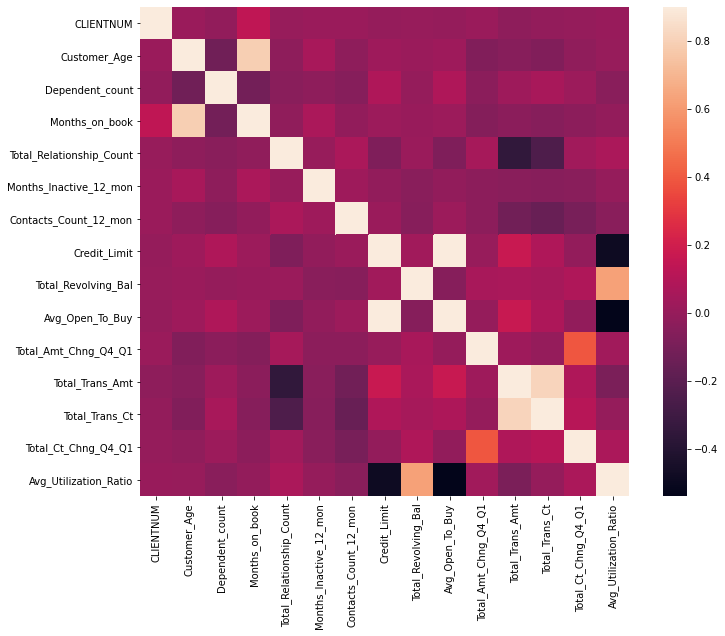

In [19]:
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

### 라벨링

In [20]:
obj_df.nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

In [21]:
df['Gender'] = pd.get_dummies(df['Gender'])
df['Education_Level'] = pd.get_dummies(df['Education_Level'])
df['Marital_Status'] = pd.get_dummies(df['Marital_Status'])
df['Income_Category'] = pd.get_dummies(df['Income_Category'])
df['Card_Category'] = pd.get_dummies(df['Card_Category'])

In [22]:
df = df.reset_index()
del df['index']
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7076,710841183,Existing Customer,54,0,1,0,0,0,1,34,...,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
7077,713899383,Existing Customer,56,1,1,0,0,0,1,50,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
7078,772366833,Existing Customer,50,0,2,0,0,0,1,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
7079,716506083,Attrited Customer,44,1,1,0,0,0,1,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
7080,714337233,Attrited Customer,43,1,2,0,0,0,0,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


## 데이터 분리

In [23]:
x_data = df.drop(['Attrition_Flag'], axis=1)
y_data = df['Attrition_Flag']

## 머신러닝 import

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier

XGBoostLibraryNotFound: Cannot find XGBoost Library in the candidate path.  List of candidates:
- C:\ProgramData\Anaconda3\lib\site-packages\xgboost\lib\xgboost.dll
- C:\ProgramData\Anaconda3\lib\site-packages\xgboost\..\..\lib\xgboost.dll
- C:\ProgramData\Anaconda3\lib\xgboost.dll
- C:\ProgramData\Anaconda3\lib\site-packages\xgboost\../../windows/x64/Release/xgboost.dll
- C:\ProgramData\Anaconda3\lib\site-packages\xgboost\./windows/x64/Release/xgboost.dll
XGBoost Python package path: C:\ProgramData\Anaconda3\lib\site-packages\xgboost
sys.prefix: C:\ProgramData\Anaconda3
See: https://xgboost.readthedocs.io/en/latest/build.html for installing XGBoost.